# Appendix A:  Consideration of sample size and smoothness effects

This document aims to summarize the contributions of sample size and smoothness to random field theory (RFT) probabilities.

An RFT correction for the probability of the domain-wide maximum t-value is given by Eqn.7 from the main manuscript:

<center>
$P(t_{\max} > u) = 1 - \exp \left[- P(t > u) \ - \ \left( \Large \frac{LKC}{2 \pi} \right)  \left(1 + \Large \frac{u^2}{\nu} \right)^{-\Large (\nu-1)/2} \right]$
</center>

where:

- $t_{\max}$ is the domain-wide maximum t-value
- $u$ is an arbitrary threshold
- LKC is the Lipschitz-Killing curvature
- $\nu$ is the degrees of freedom

The LKC is a normalized gradient estimator which is related to the more commonly reported smoothness metric: FWHM (full-width at half-maximum) as follows:

<center>
$\textrm{FWHM} =   \Large \frac{(Q-1)\sqrt{4 \log 2}}{ \textrm{LKC} }$
</center>

where $Q$ is the number of domain points.

As smoothness increases, FWHM increases and LKC decreases. As LKC approaches zero, the probability equation above simplifies to:

<center>
$P(t_{\max} > u) = 1 - \exp \left[- P(t > u) \right]$
</center>

For large $u$ (and thus small probabilities; approximately p < 0.3) the following approximation is apt:

<center>
$P(t_{\max} > u) \approx P(t > u)$
</center>

In other words, as one approaches infinite smoothness, the functional residuals approach constants (i.e., constant value across the whole domain) and the RFT correction $P(t_{\max} > u)$ approaches the standard Student's t survival function $P(t > u)$.

This smoothness-dependent behavior of the RFT correction is demonstrated numerically below.

<br>
<br>

Let's first define relevant functions:

In [1]:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



def fwhm2lkc(fwhm, Q, point_sampling=True):
    '''
    Convert full-width at half-maximum (FWHM) smoothness value(s)
    to Lipschitz-Killing curvature (LKC) value(s)

    Inputs:

    * fwhm :  scalar or array of FWHM values
    * Q :  number of domain points (or elements)
    * point_sampling : pointwise (True) or elementwise (False) domain sampling

    Outputs:

    * lkc: scalar or array of LKC values
    '''
    from math import log
    eps    = np.finfo(float).eps
    _Q  = (Q - 1) if point_sampling else Q
    lkc = _Q * ((4 * log(2))**(-0.5)) / (fwhm + eps)
    return lkc
    

def tmax_sf_rft(u, v, lkc):
    '''
    Random field theory (RFT) correction for the survival function (SF)
    of the domain-wide maximum t-value (tmax)

    Inputs:

    * u : arbitrary height threshold
    * v : degrees of freedom (scalar)
    * lkc : estimated (or known) smoothness
    '''
    from math import pi
    return 1 - np.exp( -stats.t.sf(u, v) - lkc / (2*pi) * (1 + ((u**2)/v))**( -0.5 * (v-1) ) )



<br>
<br>

Let's consider a one-sample scenario with a small sample size of $n=6$ (i.e., $\nu=5$). Let's calculate the survival functions for the following cases:

- Simple-scalar case (i.e., survival function for the Student's t distribution)
- Functional case with FWHM values of 5%, 10%, 20% and 200%

<br>
<br>

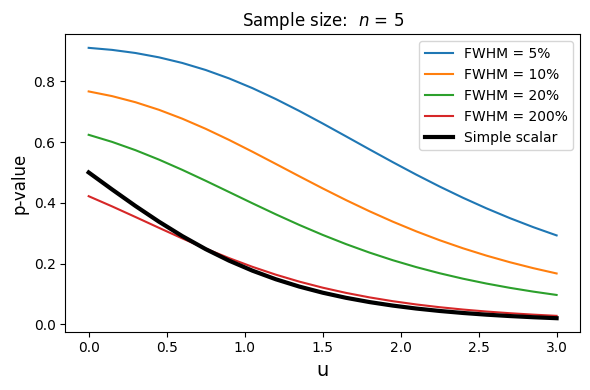

In [2]:
us    = np.linspace(0, 3, 21)   # thresholds
n     = 5    # sample size
Q     = 101  # number of domain points
fwhms = np.array( [5, 10, 20, 200] ) # smoothness (FWHM) values 
lkcs  = fwhm2lkc(fwhms, Q)  # LKC values

p0    = np.array(  [stats.t.sf(uu, n-1)  for uu in us]  )  # simple scalar survival function
p1    = np.array(  [[tmax_sf_rft(uu, n-1, lkc) for uu in us]  for lkc in lkcs]  )  # t_max (functional) survival functions


# plot results:
fig,ax = plt.subplots(1, 1, figsize=(6,4), tight_layout=True)
for ww,pp in zip(fwhms, p1):  # cycle through the FWHM values
    ax.plot(us, pp, label=f'FWHM = {ww}%')  # functional SF
ax.plot(us, p0, color='k', lw=3, label='Simple scalar')  # simple scalar SF
ax.legend()
ax.set_xlabel('u', size=14)
ax.set_ylabel('p-value', size=12)
ax.set_title( fr'Sample size:  $n$ = {n}' )
plt.show()

<br>
<br>

Note that the RFT survival function approximately converges to the simple scalar case as smoothness (FWHM) increases.

Note also that this trend is independent of sample size. This can be demonstrated by choosing a larger sample size like $n$=500 as shown below.

<br>
<br>

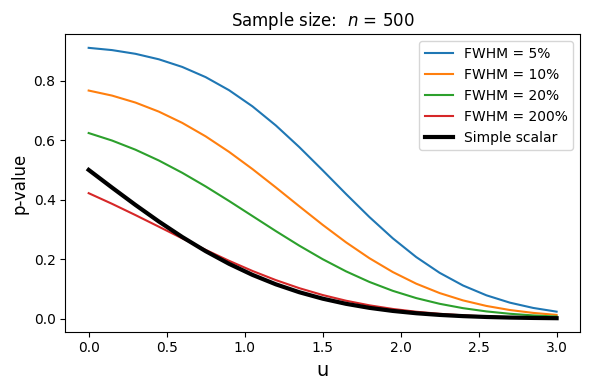

In [3]:
n     = 500
p0    = np.array(  [stats.t.sf(uu, n-1)  for uu in us]  )
p1    = np.array(  [[tmax_sf_rft(uu, n-1, lkc) for uu in us]  for lkc in lkcs]  )


fig,ax = plt.subplots(1, 1, figsize=(6,4), tight_layout=True)
for ww,pp in zip(fwhms, p1):
    ax.plot(us, pp, label=f'FWHM = {ww}%')
ax.plot(us, p0, color='k', lw=3, label='Simple scalar')
ax.legend()
ax.set_xlabel('u', size=14)
ax.set_ylabel('p-value', size=12)
ax.set_title( fr'Sample size:  $n$ = {n}' )
plt.show()

Thus smoothness, and not sample size, causes convergence to the simple scalar case.

In the context of the main manuscript, this means the following:

- If one's data are smoother than the baseline scenario in the main manuscript, where FWHM=21.9%, then the critical Cohen's d-values (Table 3, main manuscript) will converge to the simple scalar thresholds as FWHM gets larger.
- Identically, critical d-values will be larger than those in Table 3 (main manuscript) for FWHM smaller than the baseline scenario of FWHM=21.9%


Considering the gait application in the main manuscript, where FWHM=73.3%:

- Using the baseline scenario in Table 3 (main manuscript) yields relatively high thresholds (Fig.5b, main manuscript)
- Correcting the thresholds for FWHM (and sample size) yields less extreme thresholds (Fig.7, main manuscript)

Overall: the baseline scenario of FWHM=21.9% is provided in the main manuscript as a benchmark result that is likely a reasonable choice for many functional cases. However, one should ideally correct for both smoothness (FWHM) and sample size when interpreting effect sizes to ensure approximate probabilistic equivalence across different datasets and scenarios. 

